In [345]:
import pandas as pd   #import pandas to read csv filed
import numpy as np     #import numpy to create arrays for detecting the outliers

In [346]:
data=pd.read_csv('C:/Users/USER/Desktop/Sprints/Online Retail.csv')   #read csv file and show data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [347]:
data.info()   #this shows information about data(no of columns=8, no of rows=541909,types of data in each column and number of nulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Preprocessing

### removing missing values

In [348]:
#isnull function to check if there is missing data
#sum function to calculate their total in each column
data[data.columns].isnull().sum()   

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [349]:
#drop rows with missing values in customer ID colomn as it can't be handled by any values
data.dropna(subset=['CustomerID'], inplace=True)
data[data.columns].isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [350]:
data.shape # data shape attribute to show that number of rows decreased by removing missing

(406829, 8)

### Feature Extraction

In [351]:
#removing quantity and unitprice columns by forming new column which is total amount of money as the result of multiplying 2 columns
data['total_money'] = data['Quantity']*data['UnitPrice']
money = data.groupby('CustomerID')['total_money'].sum()
money = money.reset_index()
money.head()

,CustomerID,total_money
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [352]:
#removing Description column and using stockcode column instead represeting for it
#removing Quantity,UnitPrice column and replacing it by total_money column
# removing country column as I think it's not useful in analysis
data.drop(['Description','Quantity','UnitPrice','Country'], axis=1, inplace=True)

In [353]:
data.head()  #shows remaining columns after features extraction

,InvoiceNo,StockCode,InvoiceDate,CustomerID,total_money
0,536365,85123A,12/1/2010 8:26,17850.0,15.30
1,536365,71053,12/1/2010 8:26,17850.0,20.34
2,536365,84406B,12/1/2010 8:26,17850.0,22.00
3,536365,84029G,12/1/2010 8:26,17850.0,20.34
4,536365,84029E,12/1/2010 8:26,17850.0,20.34


In [354]:
data.dtypes  #shows types of data  before converting them

InvoiceNo       object
StockCode       object
InvoiceDate     object
CustomerID     float64
total_money    float64
dtype: object

In [355]:
#selecting all the categorical columns in the dataset
#and converting them into numeric for applying models by using cat.codes
data[['InvoiceNo','StockCode','InvoiceDate','CustomerID','total_money']]=data[['InvoiceNo','StockCode','InvoiceDate','CustomerID','total_money']].astype('category')
data[['InvoiceNo','StockCode','InvoiceDate','CustomerID','total_money']]=data[['InvoiceNo','StockCode','InvoiceDate','CustomerID','total_money']].apply(lambda x: x.cat.codes)

In [356]:
data

,InvoiceNo,StockCode,InvoiceDate,CustomerID,total_money
0,0,3249,6070,4048,1665
1,0,2649,6070,4048,1780
2,0,2855,6070,4048,1819
3,0,2803,6070,4048,1780
4,0,2802,6070,4048,1780
...,...,...,...,...,...
541904,18535,1470,8338,275,1520
541905,18535,1746,8338,275,1588
541906,18535,2086,8338,275,1695
541907,18535,2087,8338,275,1695


In [357]:
data.describe().T  
#show description for data before scaling
#this show that the data need to be on the same scale

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,406829.0,9950.901755,5552.295845,0.0,5060.0,10310.0,14651.0,22189.0
StockCode,406829.0,1573.257501,844.054584,0.0,937.0,1522.0,2106.0,3683.0
InvoiceDate,406829.0,9873.635245,6061.121177,0.0,4434.0,9518.0,15303.0,20459.0
CustomerID,406829.0,2176.377102,1255.543861,0.0,1196.0,2073.0,3287.0,4371.0
total_money,406829.0,1599.123376,418.219764,0.0,1303.0,1546.0,1755.0,4040.0


## Data Scaling

In [358]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   #scaling data by StandardScaler
 
data_scaled = scaler.fit_transform(data.to_numpy())
data = pd.DataFrame(data_scaled, columns=['InvoiceNo','StockCode', 'InvoiceDate','CustomerID','total_money'])

In [359]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,406829.0,-2.733182e-13,1.000001,-1.792216,-0.880880,0.064676,0.846515,2.204154
StockCode,406829.0,-1.943826e-15,1.000001,-1.863931,-0.753812,-0.060728,0.631171,2.499536
InvoiceDate,406829.0,1.106634e-14,1.000001,-1.629013,-0.897465,-0.058675,0.895770,1.746439
CustomerID,406829.0,-1.439675e-15,1.000001,-1.733416,-0.780840,-0.082337,0.884576,1.747948
total_money,406829.0,9.930257e-15,1.000001,-3.823648,-0.708058,-0.127023,0.372715,5.836356


## Applying the Models

### K-means clustering

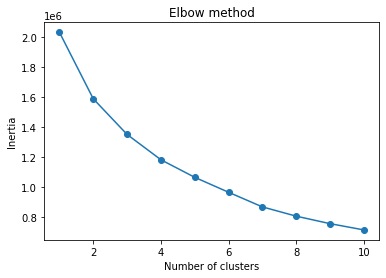

In [360]:
#before applying k_means apply elbow method to choose the optimal number of clusters for the domain 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# after applying the elbow method it shows that the most optimal number of clusters is at 3 approximatly

In [361]:
X = data.iloc[:, :].values    # X variable representing data with all columns and rows

In [362]:
from sklearn.cluster import KMeans  #import used in kmeans clustering

kmeans = KMeans(n_clusters=3)  #chosen no of clusters is 3
kmeans.fit(X)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(X)

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


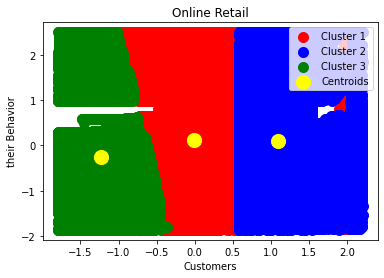

In [363]:
# Visualising the clusters(2D_visualization)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow' , label = 'Centroids')
plt.title('Online Retail')
plt.xlabel('Customers')
plt.ylabel('their Behavior')
plt.legend()
plt.show()

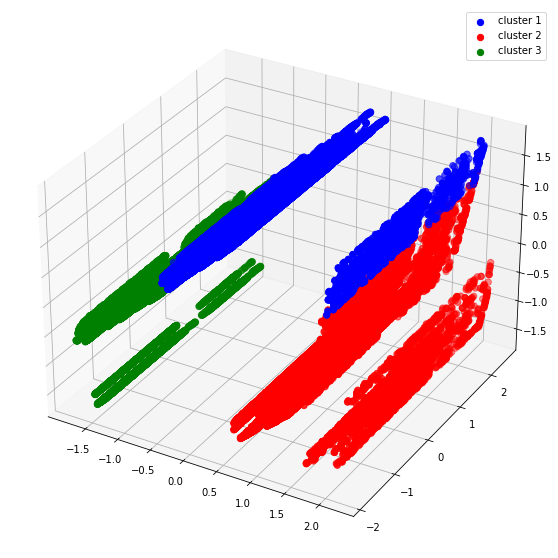

In [364]:
from matplotlib.figure import Figure #this import used in ploting figure
fig= plt.figure(figsize = (10,10))  #this shows size of figure
#3D_visualization
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 40 , color = 'blue', label = "cluster 1")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 40 , color = 'red', label = "cluster 2")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 40 , color = 'green', label = "cluster 3")

ax.legend()
plt.show()

### Hierarchical clustering

In [365]:
X = data.iloc[:10000, :].values   # X Represent data by taking only sample of size 10000 from rows and all columns to apply hierarchy as it couldn't run on this size of data

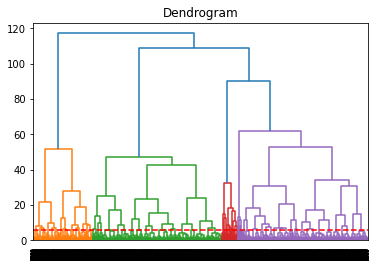

In [340]:
from scipy.cluster.hierarchy import dendrogram, linkage #import to draw dendogram
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing

plt.title("Dendrogram")  #this to show the title
dendogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
# after applying dendogram it's shown that tha most optimal number of clusters for the data is 3 clusters

Text(0.5, 1.0, 'Hierarchical clustering')

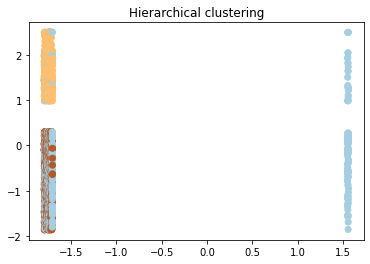

In [366]:
from sklearn.cluster import AgglomerativeClustering  #this import to apply clustering

hier = AgglomerativeClustering(n_clusters=3)  #3 is the chosen no of clusters
y_pred = hier.fit_predict(X)

plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')  #this for visualizing the clusters
plt.title("Hierarchical clustering")